In [2]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 33.4 MB/s 


In [3]:
import nltk
nltk.download('cess_esp')
import matplotlib.pyplot as plt
import re
from unidecode import unidecode
import numpy as np
import pandas as pd

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from nltk.corpus import cess_esp

In [6]:
sample_sentences = cess_esp.sents()

# Obtención de la distribución de caracteres:
Se usara un corpus de textos en español para obtener una distribución experimental de los caracteres en ese idioma. 

In [7]:
def word_preprocessing(word):
  word = unidecode(word)
  word = word.upper()
  return word

In [8]:
sample_sentences = [[word_preprocessing(word) for word in sentence] for sentence in sample_sentences] # remove accents and diacritics

In [9]:
s = " "
sample_sentences = [s.join(sentence) for sentence in sample_sentences] # join the word in order to have one list per sentence

In [10]:
# re.sub("[-_.,'?¿¡!0-9 ]{1,}",'',sample_sentences[0])
sample_sentences = [re.sub("[-_.,'?¿¡!0-9+/*\"\'{(#)}%&=~:;| ]{1,}",'',sentence) for sentence in sample_sentences] # remove everything expect for letters

In [11]:
# count the ocurrenced of each word and store it in a dictionary 
total_corpus = ""
for sentence in sample_sentences:
  total_corpus += sentence

In [12]:
alpha = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","Ñ","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

In [13]:
len(alpha)

27

In [14]:
def get_letter_distribution(corpus,alphabet = alpha):
  letter_distribution = dict()
  for symbol in alphabet:
    letter_distribution[symbol] = 0
  for character in corpus:
    letter_distribution[character]+=1
  corpus_df = corpus_df = pd.DataFrame(letter_distribution.items(),columns=["Symbol","Frequency"]).sort_values(by="Frequency",ascending=False,ignore_index=True)
  return corpus_df


In [15]:
corpus_dist = get_letter_distribution(total_corpus)

In [16]:
corpus_dist.head()

,Symbol,Frequency
0,E,112584
1,A,105361
2,O,78804
3,N,61461
4,S,61407


# Obtención de distribución del texto cifrado: 
Se usara un preprocesamiento similar a aquel que se hizo con el corpus para obtener una distribución de los caracteres más comunes y compararlos

In [17]:
handler = open("/content/drive/MyDrive/Colab Notebooks/Cryptoanalisis Goalberto/CifradoGoalberto.txt")

In [18]:
cipher_sentences = [line for line in handler]

In [19]:
cipher_sentences = cipher_sentences[0]

In [20]:
len(cipher_sentences)

12199

In [21]:
#cipher_sentences_processed = [sentence.replace(" ",'') for sentence in cipher_sentences]
cipher_sentences_processed = cipher_sentences.replace(" ",'')

In [22]:
len(cipher_sentences_processed)

10282

In [23]:
cipher_text = cipher_sentences_processed
#for sentence in cipher_sentences_processed:
#  cipher_text += sentence

In [24]:
set(cipher_text)

{'!',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '+',
 ',',
 '-',
 '/',
 ':',
 ';',
 '=',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '{',
 '|',
 '}',
 '~',
 '¬',
 '°',
 '¿',
 '“',
 '”'}

In [25]:
def get_cipher_text_distribution(cipher_text):
  cipher_dict = dict()
  alphabet = set(cipher_text)
  for symbol in alphabet:
    cipher_dict[symbol] = 0
  for character in cipher_text:
    cipher_dict[character]+=1
  cipher_df = pd.DataFrame(cipher_dict.items(),columns=["Symbol","Frequency"]).sort_values(by="Frequency",ascending=False,ignore_index=True)
  return cipher_df

In [26]:
cipher_dist = get_cipher_text_distribution(cipher_text)

In [27]:
cipher_dist.head()

,Symbol,Frequency
0,;,1327
1,$,1235
2,&,926
3,+,870
4,#,801


# Frequencias: 

Text(0.5, 1.0, 'Frequencia del Mensaje Cifrado')

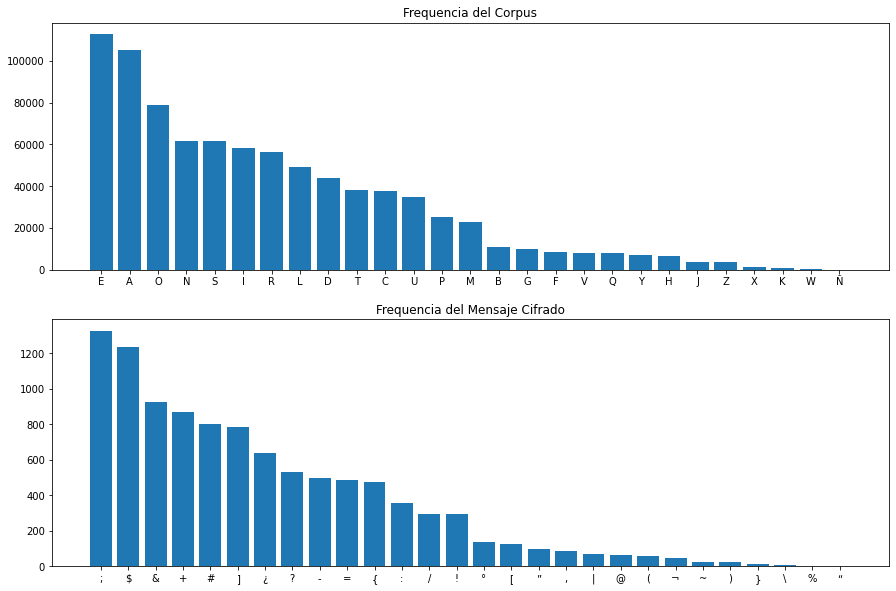

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.bar(corpus_dist["Symbol"],corpus_dist["Frequency"])
plt.title("Frequencia del Corpus")
plt.subplot(2,1,2)
plt.bar(cipher_dist["Symbol"],cipher_dist["Frequency"])
plt.title("Frequencia del Mensaje Cifrado")

In [29]:
corpus_symbols_sorted = list(corpus_dist["Symbol"])
cipher_symbols_sorted = list(cipher_dist["Symbol"][:-1])

In [30]:
print(len(corpus_symbols_sorted))
print(len(cipher_symbols_sorted))


27
27


In [31]:
traducer = dict(zip(cipher_symbols_sorted,corpus_symbols_sorted))

In [32]:
traducer

{';': 'E',
 '$': 'A',
 '&': 'O',
 '+': 'N',
 '#': 'S',
 ']': 'I',
 '¿': 'R',
 '?': 'L',
 '-': 'D',
 '=': 'T',
 '{': 'C',
 ':': 'U',
 '/': 'P',
 '!': 'M',
 '°': 'B',
 '[': 'G',
 '”': 'F',
 ',': 'V',
 '|': 'Q',
 '@': 'Y',
 '(': 'H',
 '¬': 'J',
 '~': 'Z',
 ')': 'X',
 '}': 'K',
 '\\': 'W',
 '%': 'Ñ'}

In [33]:
cipher_sentences

'$:#@:; #:;+-¿$+ °]?$+ +; °];¿&# ${-;¿$?$+ ;# ;{ ?&+ !]{ °;]#-; {$ ]#?:+-¿]$ ?; {$ =]”;¿+;[:¿]?$? °&{°]& =&# ,:;¿¬$ ;# ?&+ !]{ °;]#-]:#& !$#?]$#- $=;/-& ;{ ¿;-& ?; -¿$”$)$¿ ;# =]¿=:#+-$#=]$+ +];!/¿; =$!”]$#-;+ +]# ?;)$¿ ?; &,¿;=;¿ $ {&+ ={];#-;+ +;¿°]=]&+ ?; /¿]!;¿$ =${]?$? @:; +; $+&=]$# =&# #:;+-¿&+ ;~/;¿-&+ ;# =]”;¿+;[:¿]?$? {$+ ;~/;=-$-]°$+ +&# ,:#?$!;#-${;+ :#$ =&+$ =&# {$ @:; +];!/¿; /&?;!&+ =&#-$¿ ;+ ;{ #]°;{ ?; ]#=;¿-]?:!”¿; ;# ;{ $!”]-& =]”;¿#;-]=& {&+ $-$=$#-;+ =$!”]$# ¿;[:{$¿!;#-; +:+ -$=-]=$+ -;=#]=$+ | /¿&=;?]!];#-&+ /$¿$ ;°$?]¿ {$ ?;-;==]&# ?;)$#?& $ {&+ ?;,;#+&¿;+ {:=($#?& /$¿$ +;[:]¿ ;{ ¿]-!& =:$#?& !$#?]$#- $|:?$ $ ¿;?:=]¿ ;+$ “¿;=($ =&!/$¿-];#?& #:;+-¿&+ $/¿;#?]¬$);+ | ;~/;=-$-]°$+ ]#,&¿!$?&+ | ¿;+/${?$?&+ /&¿ /¿:;”$+ -$!”];# $°$#¬$!&+ ;# {$ !]+]&# ?; !$#?]$#- ($=;¿ @:; -&?$+ {$+ &¿[$#]¬$=]&#;+ ;+-;# +;[:¿$+ =&#-¿$ {$+ =]”;¿$!;#$¬$+ | =&#,];# ;# +: /¿;/$¿$=]&# ;{ ]#,&¿!; ?; ;+-; $%& =$-&¿=; /¿;?]==]&#;+ ?; =]”;¿+;[:¿]?$? /$¿$ ?&+ !]{ °;]#-]?&+ | !$+ ${{$ /¿;+;#-$ !$+ 

In [34]:
decoded = ""
for character in cipher_sentences:
  if character == " ":
    decoded += character
  else:
    try:
      decoded += traducer[character]
    except:
      continue

In [35]:
decoded

'AUSYUE SUENDRAN BILAN NE BIEROS ACDERALAN ES EC LON MIC BEISDE CA ISLUNDRIA LE CA TIFERNEGURILAL BOCBIO TOS VUERJA ES LON MIC BEISDIUSO MASLIASD ATEPDO EC REDO LE DRAFAXAR ES TIRTUSNDASTIAN NIEMPRE TAMFIASDEN NIS LEXAR LE OVRETER A CON TCIESDEN NERBITION LE PRIMERA TACILAL YUE NE ANOTIAS TOS SUENDRON EZPERDON ES TIFERNEGURILAL CAN EZPETDADIBAN NOS VUSLAMESDACEN USA TONA TOS CA YUE NIEMPRE POLEMON TOSDAR EN EC SIBEC LE ISTERDILUMFRE ES EC AMFIDO TIFERSEDITO CON ADATASDEN TAMFIAS REGUCARMESDE NUN DATDITAN DETSITAN Q PROTELIMIESDON PARA EBALIR CA LEDETTIOS LEXASLO A CON LEVESNOREN CUTHASLO PARA NEGUIR EC RIDMO TUASLO MASLIASD AQULA A RELUTIR ENA RETHA TOMPARDIESLO SUENDRON APRESLIJAXEN Q EZPETDADIBAN ISVORMALON Q RENPACLALON POR PRUEFAN DAMFIES ABASJAMON ES CA MINIOS LE MASLIASD HATER YUE DOLAN CAN ORGASIJATIOSEN ENDES NEGURAN TOSDRA CAN TIFERAMESAJAN Q TOSVIES ES NU PREPARATIOS EC ISVORME LE ENDE AÑO TADORTE PRELITTIOSEN LE TIFERNEGURILAL PARA LON MIC BEISDILON Q MAN ACCA PRENESDA MAN L

In [49]:
traducer_update = {';': 'E',
                  '$': 'A',
                  '&': 'O',
                  '#': 'N',
                  '+': 'S',
                  ']': 'I',
                  '¿': 'R',
                  '{': 'L',
                  '?': 'D',
                  '-': 'T',
                  '=': 'C',
                  ':': 'U',
                  '/': 'P',
                  '!': 'M',
                  '”': 'B',
                  '[': 'G',
                  ',': 'F',
                  '°': 'V',
                  '@': 'Q',
                  '|': 'Y',
                  '(': 'H',
                  ')': 'J',
                  '¬': 'Z',
                  '~': 'X',
                  '\\': 'K',
                  '}': 'W',
                  '%': 'Ñ',
                  ' ': ' '
                  }

In [50]:
def apply_update(cipher,traducer_updated):
  decoded_new = ""
  for character in cipher:
    try:
      decoded_new +=  traducer_updated[character]
    except:
      continue
  return decoded_new
      
    

In [51]:
decoded_update = apply_update(cipher_sentences,traducer_update)

In [52]:
decoded_update

'AUNQUE NUESTRAS VIDAS SE VIERON ALTERADAS EN EL DOS MIL VEINTE LA INDUSTRIA DE LA CIBERSEGURIDAD VOLVIO CON FUERZA EN DOS MIL VEINTIUNO MANDIANT ACEPTO EL RETO DE TRABAJAR EN CIRCUNSTANCIAS SIEMPRE CAMBIANTES SIN DEJAR DE OFRECER A LOS CLIENTES SERVICIOS DE PRIMERA CALIDAD QUE SE ASOCIAN CON NUESTROS EXPERTOS EN CIBERSEGURIDAD LAS EXPECTATIVAS SON FUNDAMENTALES UNA COSA CON LA QUE SIEMPRE PODEMOS CONTAR ES EL NIVEL DE INCERTIDUMBRE EN EL AMBITO CIBERNETICO LOS ATACANTES CAMBIAN REGULARMENTE SUS TACTICAS TECNICAS Y PROCEDIMIENTOS PARA EVADIR LA DETECCION DEJANDO A LOS DEFENSORES LUCHANDO PARA SEGUIR EL RITMO CUANDO MANDIANT AYUDA A REDUCIR ESA RECHA COMPARTIENDO NUESTROS APRENDIZAJES Y EXPECTATIVAS INFORMADOS Y RESPALDADOS POR PRUEBAS TAMBIEN AVANZAMOS EN LA MISION DE MANDIANT HACER QUE TODAS LAS ORGANIZACIONES ESTEN SEGURAS CONTRA LAS CIBERAMENAZAS Y CONFIEN EN SU PREPARACION EL INFORME DE ESTE AÑO CATORCE PREDICCIONES DE CIBERSEGURIDAD PARA DOS MIL VEINTIDOS Y MAS ALLA PRESENTA MAS D